In [ ]:
!pip install --upgrade --quiet catboost pandas openpyxl scikit-learn joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 19.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [ ]:
!pip install numpy==1.26.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install pandas==2.2.2 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 23.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.

In [7]:
import pandas as pd
import joblib
from catboost import CatBoostClassifier

model = CatBoostClassifier()
model.load_model("catboost_news_classifier_1-7.cbm")
tfidf = joblib.load("tfidf_vectorizer_1-5.pkl")

df = pd.read_excel("РБК. Новости. Главное_tg_parsed_no_emoji.xlsx")

df["text"] = df["text"].fillna("")

X_text = tfidf.transform(df["text"])

preds = model.predict(X_text)

df["predicted_category"] = preds.ravel()
df.to_excel("rbc_predictions_no_wordcount.xlsx", index=False)

Готово! Результаты сохранены в файл: rbc_predictions_no_wordcount.xlsx


In [8]:
df.head()

,date,text,link,picture,video,word_count,predicted_category
0,2025-05-08 07:54:01,"Аэропорты Москвы — Шереметьево, Внуково, Домод...",https://t.me/rbc_news/117689,0,0,52,Общество
1,2025-05-08 07:36:28,"Си Цзиньпин заявил, что 80 лет назад «китайски...",https://t.me/rbc_news/117688,0,0,72,Спорт
2,2025-05-08 07:27:13,"Путин сказал, что будет рад «вновь посетить др...",https://t.me/rbc_news/117687,0,1,28,Политика
3,2025-05-08 07:18:55,В Кремле началась встреча Путина и Си Цзиньпин...,https://t.me/rbc_news/117686,0,1,16,Технологии и медиа
4,2025-05-08 07:11:21,Истребители Индии и Пакистана сразились в возд...,https://t.me/rbc_news/117685,1,0,152,Общество


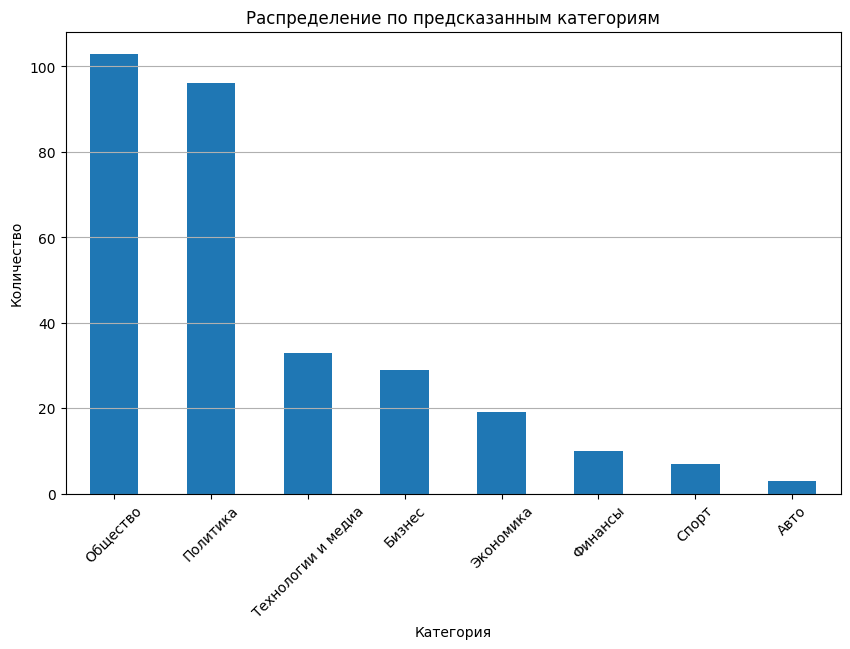

In [9]:
import matplotlib.pyplot as plt

category_counts = df["predicted_category"].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel("Категория")
plt.ylabel("Количество")
plt.title("Распределение по предсказанным категориям")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()